<a href="https://colab.research.google.com/github/mpudoka/Data_Management/blob/main/dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mani_dataframe= pd.read_csv('DiabetesPrev.csv')

In [3]:
mani_dataframe.columns

Index(['year', 'fips', 'state_fips', 'county_fips', 'county_name',
       'state_name', 'state_abbr', 'metro_nonmetro',
       'diabetes_population_20_over', 'total_population_inferred_20_over'],
      dtype='object')

In [4]:
mani_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25137 entries, 0 to 25136
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               25137 non-null  int64  
 1   fips                               25137 non-null  int64  
 2   state_fips                         25137 non-null  int64  
 3   county_fips                        25137 non-null  int64  
 4   county_name                        25137 non-null  object 
 5   state_name                         25137 non-null  object 
 6   state_abbr                         25137 non-null  object 
 7   metro_nonmetro                     25137 non-null  object 
 8   diabetes_population_20_over        25137 non-null  float64
 9   total_population_inferred_20_over  25137 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.9+ MB


In [5]:
mani_dataframe.shape

(25137, 10)

In [6]:
mani_dataframe.head()

,year,fips,state_fips,county_fips,county_name,state_name,state_abbr,metro_nonmetro,diabetes_population_20_over,total_population_inferred_20_over
0,2007,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4044.0,35474.0
1,2011,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4748.0,39240.0
2,2009,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4338.0,35268.0
3,2006,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4038.0,35421.0
4,2012,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4724.0,39367.0


In [7]:
mani_dataframe.describe()

,year,fips,state_fips,county_fips,diabetes_population_20_over,total_population_inferred_20_over
count,25137.000000,25137.000000,25137.000000,25137.000000,25137.000000,2.513700e+04
mean,2009.500457,30396.313283,30.292597,103.716712,6657.227847,7.171656e+04
std,2.291186,15157.850714,15.139568,107.939015,19304.809445,2.280921e+05
min,2006.000000,1001.000000,1.000000,1.000000,4.000000,3.800000e+01
25%,2008.000000,18179.000000,18.000000,35.000000,874.000000,8.192000e+03
50%,2010.000000,29177.000000,29.000000,79.000000,2059.000000,1.902200e+04
75%,2012.000000,45083.000000,45.000000,133.000000,5037.000000,4.924800e+04
max,2013.000000,56045.000000,56.000000,840.000000,678712.000000,7.458374e+06


In [8]:
mani_dataframe.isnull().sum()

year                                 0
fips                                 0
state_fips                           0
county_fips                          0
county_name                          0
state_name                           0
state_abbr                           0
metro_nonmetro                       0
diabetes_population_20_over          0
total_population_inferred_20_over    0
dtype: int64

# Diabetes Prevalence Over Time

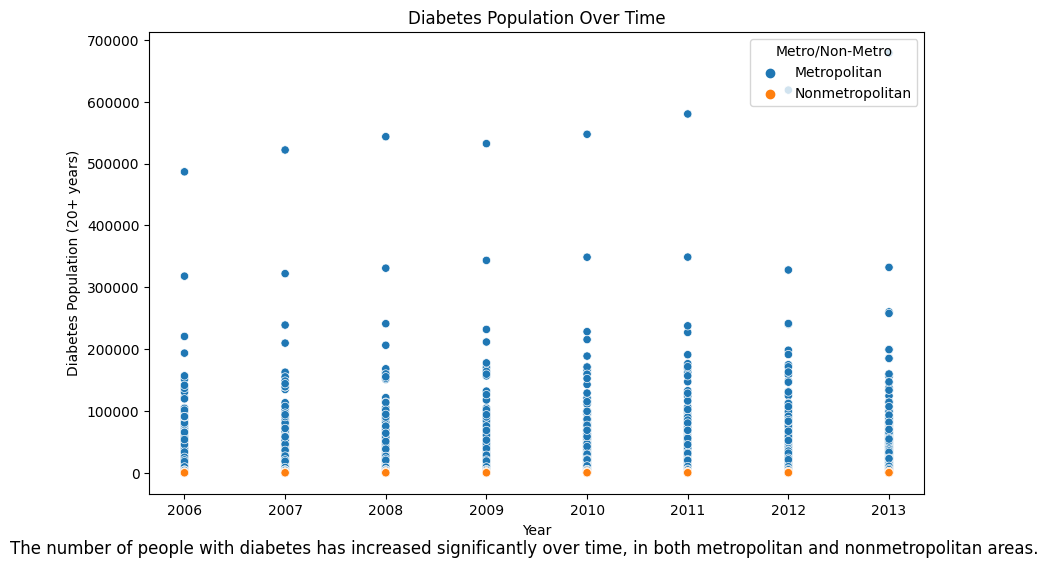

In [9]:
# Scatterplot of Diabetes Population Over Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='diabetes_population_20_over', data=mani_dataframe, hue='metro_nonmetro')
plt.title('Diabetes Population Over Time')
plt.xlabel('Year')
plt.ylabel('Diabetes Population (20+ years)')
plt.legend(title='Metro/Non-Metro', loc='upper right')

# Adding a general caption below the plot
plt.figtext(0.5, 0.01, "The number of people with diabetes has increased significantly over time, in both metropolitan and nonmetropolitan areas.", ha='center', fontsize=12)

plt.show()




# Distribution of Diabetes Population (20+ years)

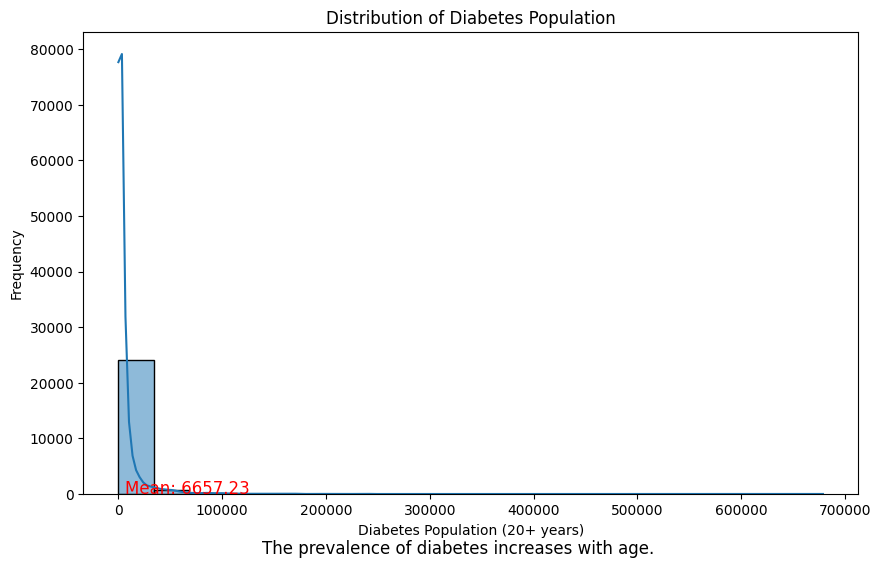

In [10]:
# Histogram of Distribution of Diabetes Population
plt.figure(figsize=(10, 6))
sns.histplot(mani_dataframe['diabetes_population_20_over'], bins=20, kde=True)
plt.title('Distribution of Diabetes Population')
plt.xlabel('Diabetes Population (20+ years)')
plt.ylabel('Frequency')

# Calculate the mean of the 'diabetes_population_20_over' column
mean_diabetes = mani_dataframe['diabetes_population_20_over'].mean()

# Add a text annotation for the mean
plt.text(mean_diabetes, 50, f'Mean: {mean_diabetes:.2f}', fontsize=12, color='red', ha='left')
plt.figtext(0.5, 0.01, "The prevalence of diabetes increases with age.", ha='center', fontsize=12)
plt.show()


In [11]:
mani_dataframe['diabetes_population_20_over'].max()

678712.0

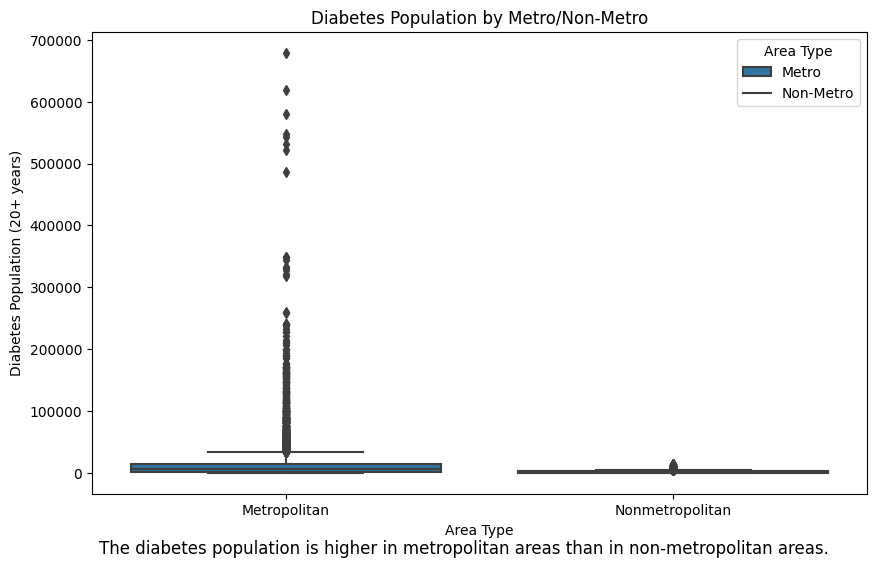

In [12]:
# boxplot of Diabetes Population by Metro/Non-Metro
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='metro_nonmetro', y='diabetes_population_20_over', data=mani_dataframe)
plt.title('Diabetes Population by Metro/Non-Metro')
plt.xlabel('Area Type')
plt.ylabel('Diabetes Population (20+ years)')

# Adding a custom legend
legend_labels = ['Metro', 'Non-Metro']
legend = ax.legend(legend_labels, title='Area Type', loc='upper right')

plt.figtext(0.5, 0.01, "The diabetes population is higher in metropolitan areas than in non-metropolitan areas. ", ha='center', fontsize=12)
plt.show()


In [2]:
library(ggplot2)
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Warning message in RColorBrewer::brewer.pal(1, "Set2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


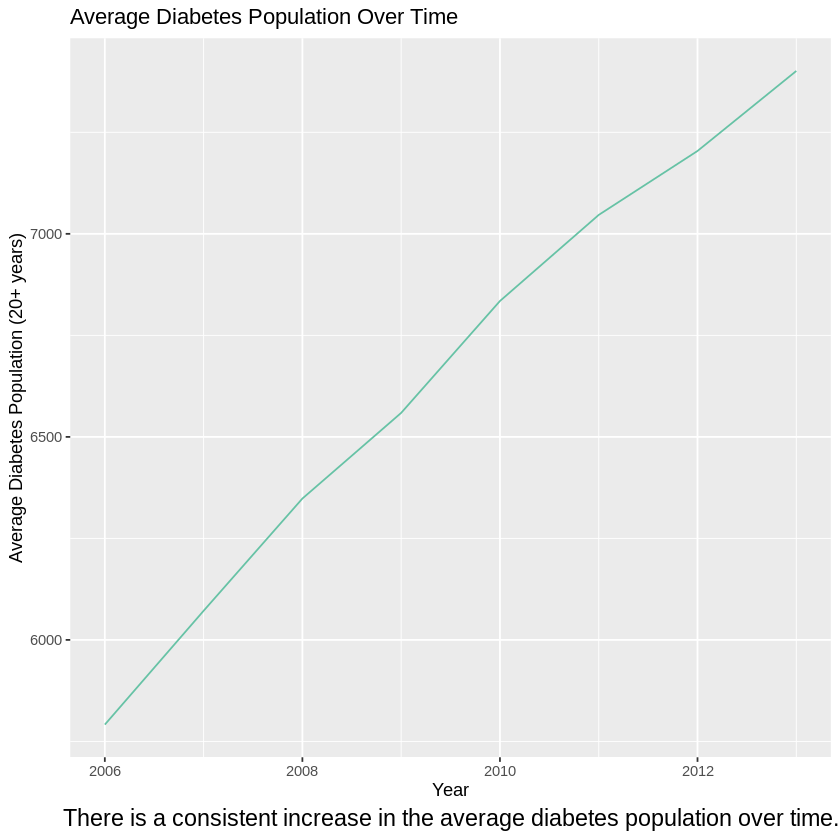

In [4]:
## Line chart
mani_dataframe <- read.csv('DiabetesPrev.csv')
line_chart <- mani_dataframe %>%
  group_by(year) %>%
  summarize(mean_diabetes = mean(diabetes_population_20_over))
ggplot(line_chart, aes(x=year, y=mean_diabetes)) +
  geom_line(color = RColorBrewer::brewer.pal(1, 'Set2')[1]) +
  labs(title = 'Average Diabetes Population Over Time',
       x = 'Year',
       y = 'Average Diabetes Population (20+ years)')+
  theme(plot.caption = element_text(hjust = 0.5, size = 14)) +
  labs(caption = "There is a consistent increase in the average diabetes population over time.")




`geom_smooth()` using formula = 'y ~ x'


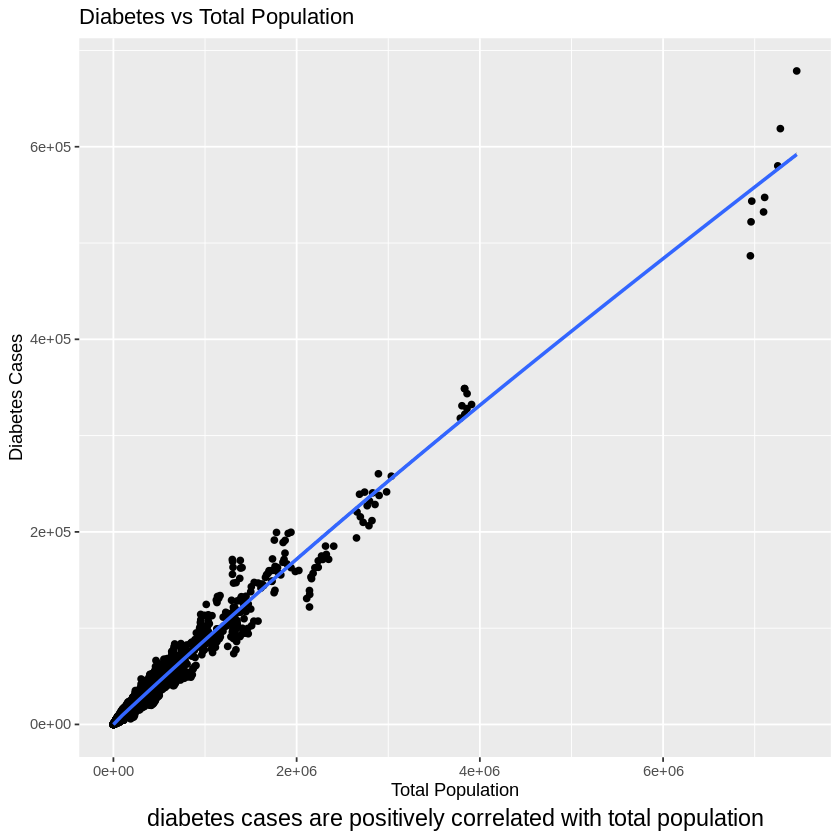

In [5]:
# Loess regression with shaded confidence bands
scatter_loess <- ggplot(mani_dataframe, aes(x = total_population_inferred_20_over,
                                            y = diabetes_population_20_over)) +
              geom_point() +
              geom_smooth(method='loess', se=TRUE, fullrange=TRUE) +
              labs(title = 'Diabetes vs Total Population',
                   x = 'Total Population',
                   y = 'Diabetes Cases')+
  theme(plot.caption = element_text(hjust = 0.5, size = 14)) +
  labs(caption = "diabetes cases are positively correlated with total population")

scatter_loess

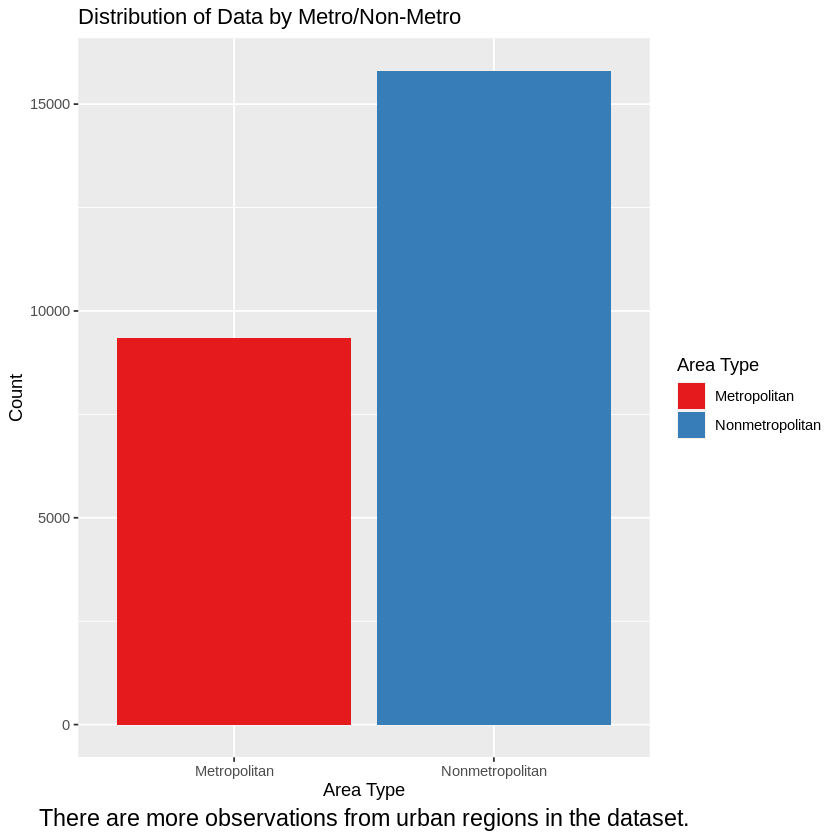

In [5]:
# Create a bar chart
bar_chart <- ggplot(mani_dataframe, aes(x = metro_nonmetro, fill = metro_nonmetro)) +
  geom_bar() +
  scale_fill_brewer(palette="Set1") +
  labs(title = 'Distribution of Data by Metro/Non-Metro',
       x = 'Area Type',
       y = 'Count') +
  guides(fill = guide_legend(title = 'Area Type')) +
  theme(plot.caption = element_text(hjust = 0.5, size = 14)) +
  labs(caption = "There are more observations from urban regions in the dataset.")

print(bar_chart)